<a href="https://colab.research.google.com/github/EktaGupta98/NeuralNexus/blob/main/Finaltask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

We will be performing PREDICTION on our dataset-Spotify(tracks.csv)
We will be classifying tracks on the basis of time_signature column which will be our target column

# **Importing the necessary libraries**

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import ConfusionMatrixDisplay

# **Understanding the dataset**

In [2]:
tracks=pd.read_csv('/content/drive/MyDrive/Ekta_2023UCA2142/Dataset/tracks.csv')

In [3]:
print(tracks.shape),print(tracks.describe()),print(tracks.info())

(586672, 20)
          popularity   duration_ms       explicit   danceability  \
count  586672.000000  5.866720e+05  586672.000000  586672.000000   
mean       27.570053  2.300512e+05       0.044086       0.563594   
std        18.370642  1.265261e+05       0.205286       0.166103   
min         0.000000  3.344000e+03       0.000000       0.000000   
25%        13.000000  1.750930e+05       0.000000       0.453000   
50%        27.000000  2.148930e+05       0.000000       0.577000   
75%        41.000000  2.638670e+05       0.000000       0.686000   
max       100.000000  5.621218e+06       1.000000       0.991000   

              energy            key       loudness           mode  \
count  586672.000000  586672.000000  586672.000000  586672.000000   
mean        0.542036       5.221603     -10.206067       0.658797   
std         0.251923       3.519423       5.089328       0.474114   
min         0.000000       0.000000     -60.000000       0.000000   
25%         0.343000       2.

(None, None, None)

In [4]:
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [5]:
tracks['time_signature'].unique()

array([3, 1, 5, 4, 0])

In [6]:
tracks['time_signature'].value_counts()

,count
time_signature,
4,503808
3,64523
5,11400
1,6604
0,337


In [7]:
tracks[tracks.duplicated()]
#no duplicate values

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature


# **Adding or Modifying features**

In [8]:
tracks['duration_hour']=tracks['duration_ms']/3600000
tracks['release_year']=tracks['release_date'].copy()
tracks['release_month']=tracks['release_date'].copy()
tracks['release_Date']=tracks['release_date'].copy()
tracks['release_year']=tracks['release_year'].str.split('-').str[0]
tracks['release_month']=tracks['release_month'].str.split('-').str[1]
tracks['release_Date']=tracks['release_Date'].str.split('-').str[2]
tracks=tracks.drop(columns=['duration_ms','release_date'])

# **Handling missing values**

In [9]:
tracks.isna().sum()

,0
id,0
name,71
popularity,0
explicit,0
artists,0
id_artists,0
danceability,0
energy,0
key,0
loudness,0


In [10]:
tracks['release_month']=tracks['release_month'].fillna(tracks['release_month'].mode()[0])
tracks['release_Date']=tracks['release_Date'].fillna(tracks['release_Date'].mode()[0])
tracks['name']=tracks['name'].fillna('unknown')

In [11]:
sum=0
for i in tracks.columns:
  sum+=tracks[i].isna().sum()
print(sum)

0


In [13]:
tracks['release_Date'].dtype
# as its data type is object it give problem when we fir the model so we convert it into int

dtype('O')

In [14]:
tracks['release_year']=tracks['release_year'].astype(int)
tracks['release_month']=tracks['release_month'].astype(int)
tracks['release_Date']=tracks['release_Date'].astype(int)

# **Visualizing the dataset**

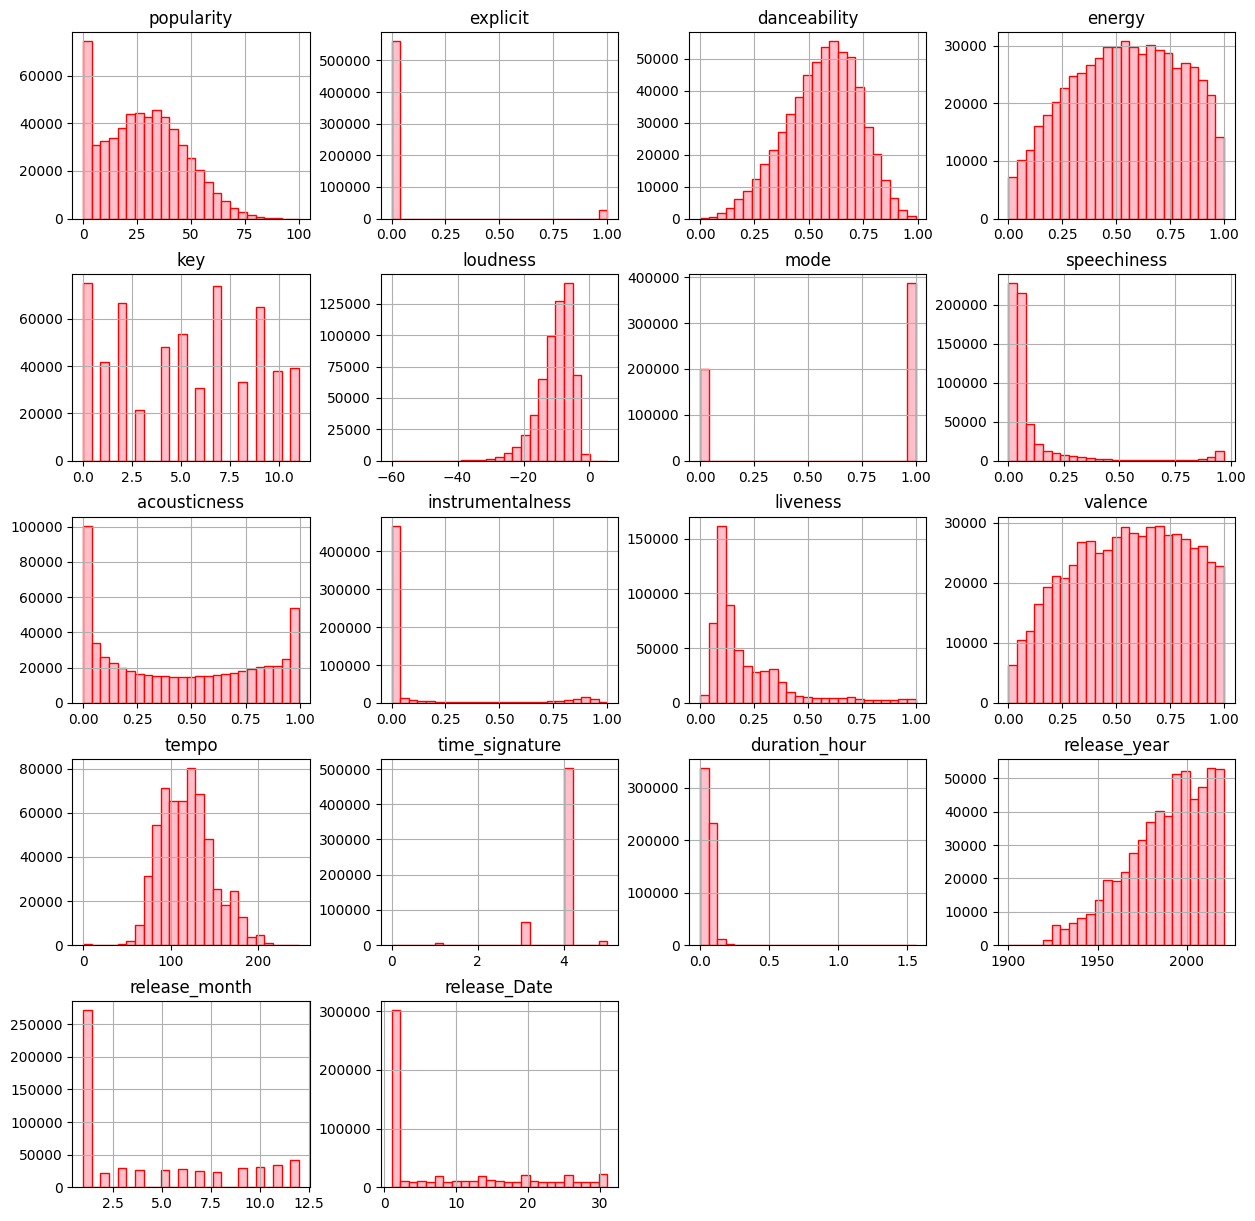

In [15]:
tracks.hist(figsize=(15,15), bins=25, color='pink', edgecolor='red')
plt.show()

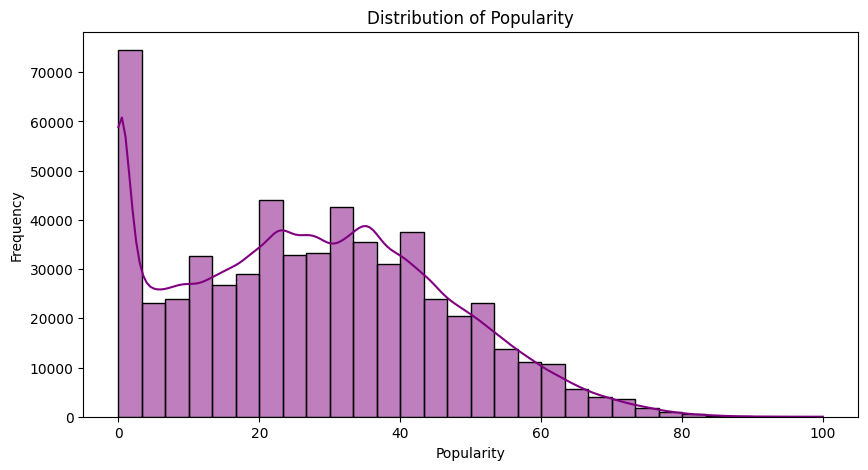

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(tracks['popularity'], bins=30, kde=True, color='purple')
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

<h1>Drop columns</h1>

In [17]:
#dropping categorical columns as they do not have any relation with other variables
new_df=tracks.drop(columns=['id','name','id_artists','artists'])

Text(0.5, 1.0, 'Feature Correlation Heatmap')

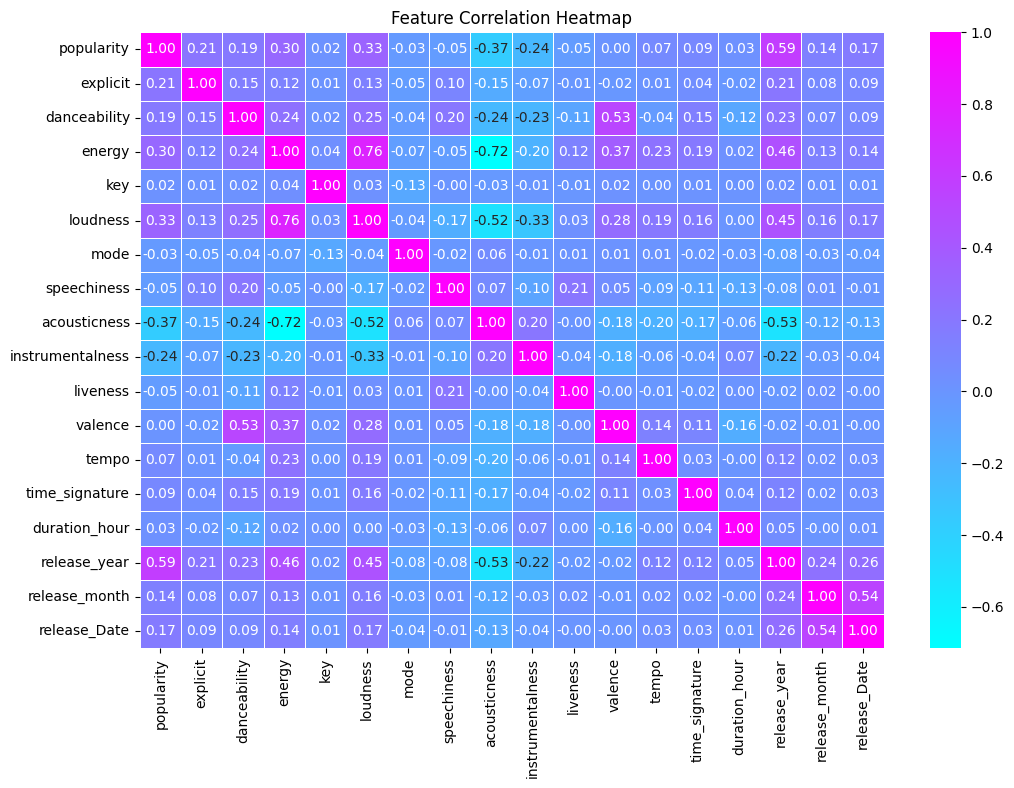

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(new_df.corr(), annot=True, cmap='cool', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')

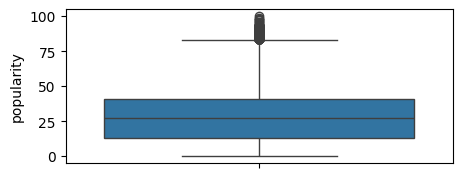

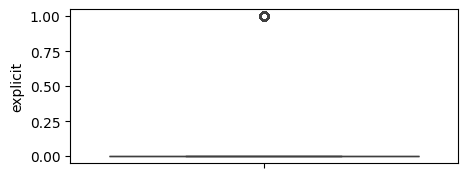

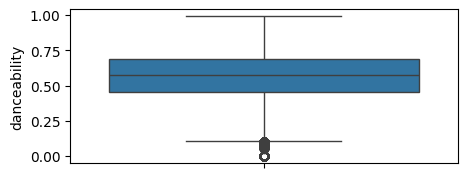

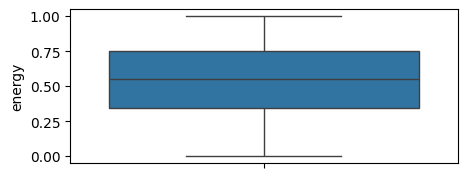

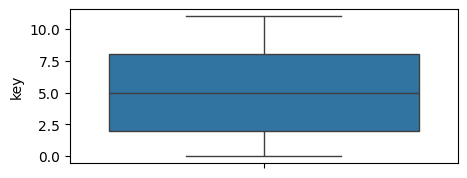

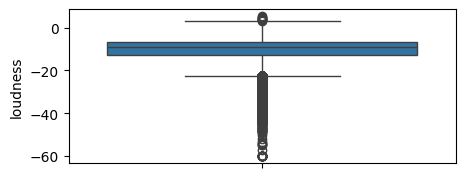

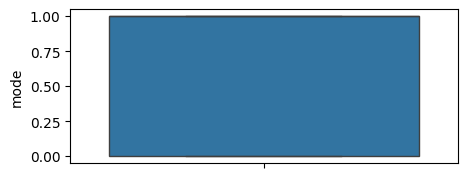

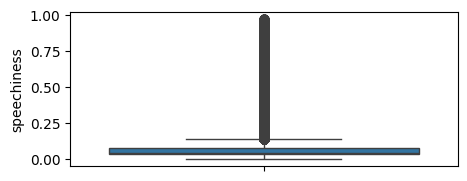

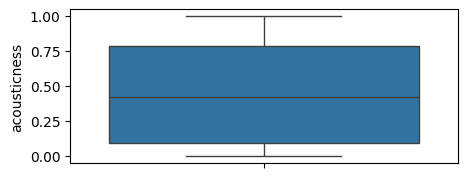

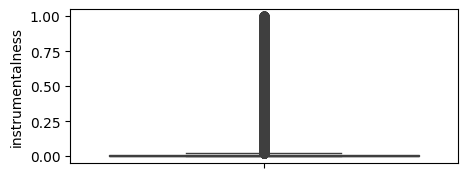

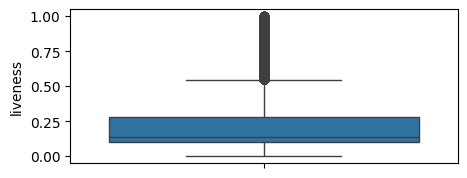

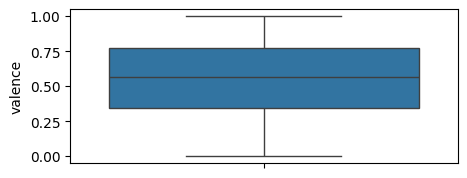

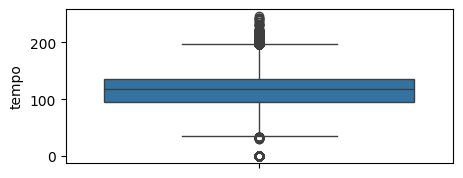

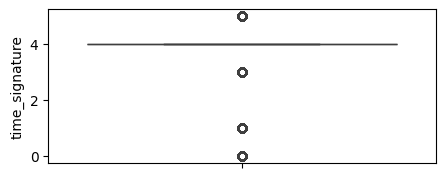

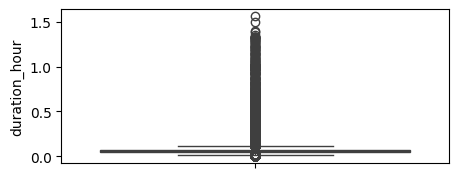

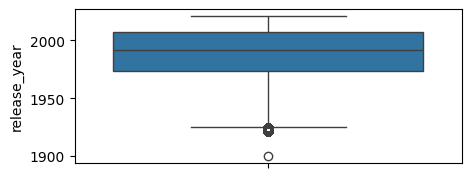

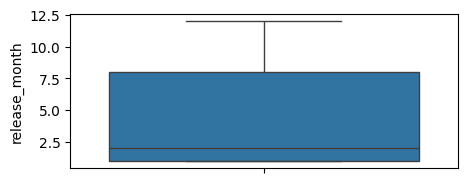

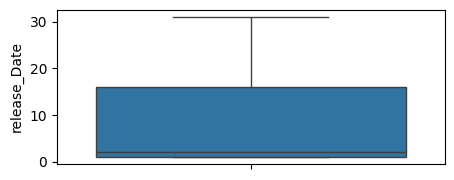

In [19]:
for i in new_df.columns:
  plt.figure(figsize=(5,2))
  sns.boxplot(new_df[i])

#we see that we have outliers in popularity, loudness, speechiness, instrumentalness, liveness, tempo and duration_hour

# **Handling outliers by z-score and iqr method**

In [20]:
ul_of_duration=new_df['duration_hour'].mean()+3*new_df['duration_hour'].std()
ll_of_duration=new_df['duration_hour'].mean()-3*new_df['duration_hour'].std()
ul_of_liveness=new_df['liveness'].mean()+3*new_df['liveness'].std()
ll_of_liveness=new_df['liveness'].mean()-3*new_df['liveness'].std()
ul_of_speechiness=new_df['speechiness'].mean()+3*new_df['speechiness'].std()
ll_of_spechiness=new_df['speechiness'].mean()-3*new_df['speechiness'].std()
ul_of_instrumentalness=new_df['instrumentalness'].mean()+3*new_df['instrumentalness'].std()
ll_of_instrumentalness=new_df['instrumentalness'].mean()-3*new_df['instrumentalness'].std()
new_df['liveness']=np.where(
    new_df['liveness']>ul_of_liveness,
    ul_of_liveness,
    np.where(
        new_df['liveness']<ll_of_liveness,
        ll_of_liveness,
        new_df['liveness'] # if both not same rehne do
    )
)
new_df['duration_hour']=np.where(
    new_df['duration_hour']>ul_of_duration,
    ul_of_duration,
    np.where(
        new_df['duration_hour']<ll_of_duration,
        ll_of_duration,
        new_df['duration_hour'] # if both not same rehne do
    )
)
new_df['speechiness']=np.where(
    new_df['speechiness']>ul_of_speechiness,
    ul_of_speechiness,
    np.where(
        new_df['speechiness']<ll_of_spechiness,
        ll_of_spechiness,
        new_df['speechiness'] # if both not same rehne do
    )
)
new_df['instrumentalness']=np.where(
    new_df['instrumentalness']>ul_of_instrumentalness,
    ul_of_instrumentalness,
    np.where(
        new_df['instrumentalness']<ll_of_instrumentalness,
        ll_of_instrumentalness,
        new_df['instrumentalness'] # if both not same rehne do
    )
)


In [21]:
percentile25_popularity = new_df['popularity'].quantile(0.25)
percentile75_popularity = new_df['popularity'].quantile(0.75)
percentile25_tempo = new_df['tempo'].quantile(0.25)
percentile75_tempo = new_df['tempo'].quantile(0.75)

# Calculate IQR for both columns
iqr1 = percentile75_popularity - percentile25_popularity
iqr2 = percentile75_tempo - percentile25_tempo

# Define upper and lower limits for outliers
ul_of_popularity = percentile75_popularity + 1.5 * iqr1
ll_of_popularity = percentile25_popularity - 1.5 * iqr1

ul_of_tempo = percentile75_tempo + 1.5 * iqr2
ll_of_tempo = percentile25_tempo - 1.5 * iqr2

# Display the values
print(f"Upper Limit of Popularity: {ul_of_popularity}")
print(f"Lower Limit of Popularity: {ll_of_popularity}")
print(f"Upper Limit of Tempo: {ul_of_tempo}")
print(f"Lower Limit of Tempo: {ll_of_tempo}")


Upper Limit of Popularity: 83.0
Lower Limit of Popularity: -29.0
Upper Limit of Tempo: 197.4025
Lower Limit of Tempo: 34.51849999999999


In [22]:
new_df['popularity']=np.where(
    new_df['popularity']>ul_of_popularity,
    ul_of_popularity,
    np.where(
        new_df['popularity']<ll_of_popularity,
        ll_of_popularity,
        new_df['popularity'],
    )
)
new_df['tempo']=np.where(
    new_df['tempo']>ul_of_tempo,
    ul_of_tempo,
    np.where(
        new_df['tempo']<ll_of_tempo,
        ll_of_tempo,
        new_df['tempo'],
    )
)

# **Model implementation**

In [24]:
X=new_df.drop(columns=['time_signature'])
Y=new_df['time_signature']

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [26]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(X_train, Y_train)

LogisticRegression()

In [28]:
Y_pred_lgr=lgr.predict(X_test)
accuracy_lgr=accuracy_score(Y_test, Y_pred_lgr)
print(accuracy_lgr)

0.859445178335535


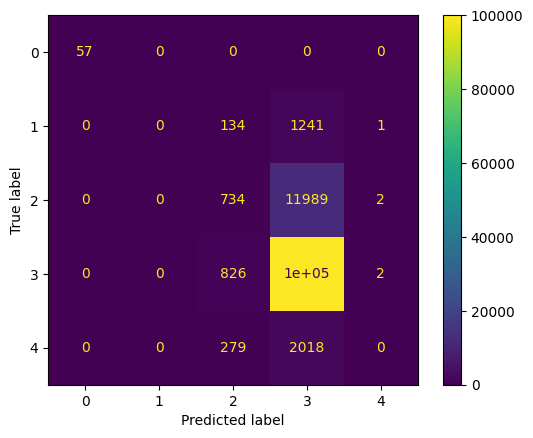

In [31]:
#Naive Byes
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, Y_train)
Y_pred_nb = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb}")

Naive Bayes Accuracy: 0.7659010525418674


In [32]:
#K Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, Y_train)
Y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn}")

K-Nearest Neighbors Accuracy: 0.8469084245962415


In [33]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, Y_train)
Y_pred_rfc = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(Y_test, Y_pred_rfc)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.8680530106106448


In [34]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, Y_train)
Y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.2f}")


Decision Tree Classifier Accuracy: 0.80


In [36]:
# Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, Y_train)
Y_pred_gb = gb_classifier.predict(X_test)
accuracy_gb = accuracy_score(Y_test, Y_pred_gb)
print(f"Gradient Boosting Classifier Accuracy: {accuracy_gb}")

Gradient Boosting Classifier Accuracy: 0.8613116290961776


In [37]:
# Ada Boost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, Y_train)
y_pred_ada = ada.predict(X_test)
accuracy_abc = accuracy_score(Y_test, y_pred_ada)
print(f"Accuracy for AdaBoostClassifier: {accuracy_abc}")

Accuracy for AdaBoostClassifier: 0.8565730600417608


<ipython-input-54-4a8a4b39dfbc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy,palette='viridis')


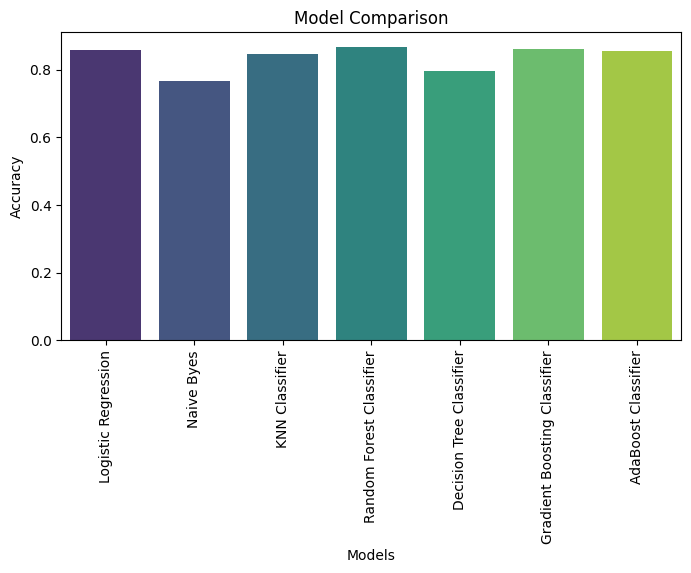

In [54]:
models=['Logistic Regression', 'Naive Byes', 'KNN Classifier', 'Random Forest Classifier', 'Decision Tree Classifier', 'Gradient Boosting Classifier', 'AdaBoost Classifier']
accuracy=[accuracy_lgr, accuracy_nb, accuracy_knn, accuracy_rf, accuracy_dt, accuracy_gb, accuracy_abc]
# Plotting comparison of models
plt.figure(figsize=(8,4))
sns.barplot(x=models, y=accuracy,palette='viridis')
plt.xlabel('Models')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()

In [46]:
# Random Forest Classifier has highest accuracy

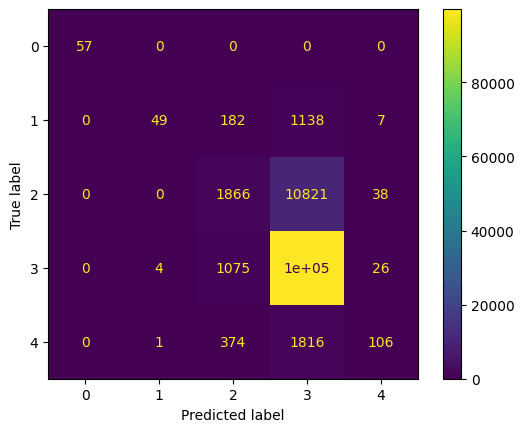

In [53]:
ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred_rfc)).plot()
plt.show()

# To check the importance of columns in random forest

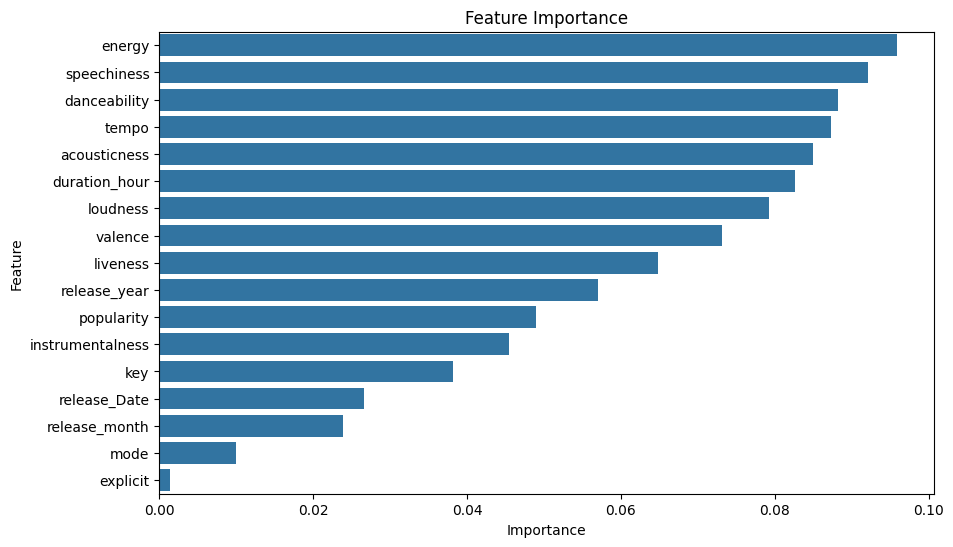

In [51]:
model=rf_classifier
importances = model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()